In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import arabic_reshaper
from bidi.algorithm import get_display
import random
import unicodedata
from pathlib import Path
from PIL import ImageFont, ImageDraw, Image
import arabic_reshaper
from bidi.algorithm import get_display
import os


In [2]:
import os
import cv2
import random

folder_path = "./BackgroundCreditcard"  # مسیر فولدر حاوی تصاویر
new_folder_path = "./Back"  # مسیر فولدر جدید برای ذخیره تصاویر با نام‌های تغییر یافته

if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)

filenames = os.listdir(folder_path)
random.shuffle(filenames)  # تغییر ترتیب نام‌های تصاویر به صورت رندوم

i = 1
for filename in filenames:
    img_path = os.path.join(folder_path, filename)
    if os.path.isfile(img_path):
        img = cv2.imread(img_path)
        new_filename = str(i) + ".jpg"  # تولید نام جدید برای تصویر با ترتیب جدید
        new_img_path = os.path.join(new_folder_path, new_filename)
        cv2.imwrite(new_img_path, img)
        i += 1

In [3]:
def generate_card_number():    
    # تولید یک شماره کارت بانکی با فرمت 16 رقم
    card_numbers = []
    j=0
    while j <10000:
        card_number = ""
        for i in range(16):
            if i==4 or i==8 or i==12 :
                card_number+='  '
            card_number += str(random.randint(0, 9))
            
        if card_number not in card_numbers:        
            card_numbers.append(card_number)    
            j+=1    
            
    return card_numbers

cardnums=generate_card_number()
print(cardnums[:5])

with open("./datacreditcard/labels.txt", "w") as o:
    o.write('\n'.join(cardnums))



    

['0974  6867  7118  7899', '3556  7932  5743  0375', '1944  1485  9314  3272', '7676  9844  6860  0211', '5613  7293  3396  6812']


In [4]:
def national_card_number():    
    # تولید یک شماره کارت بانکی با فرمت 16 رقم
    national_numbers = []
    numbers=['۰', '۱', '۲', '۳', '۴', '۵', '۶', '۷', '۸', '۹']
    j=0
    while j <10000:
        national_number = ""
        for i in range(10):            
            random_digit = random.choice(numbers)
            national_number+=str(random_digit)
            
        if national_number not in national_numbers:        
            national_numbers.append(national_number)    
            j+=1                
    return national_numbers

cardnumsn=national_card_number()
print(cardnumsn[:5])

with open("./datanationalcard/labels.txt", "w", encoding="utf-8") as o:
    o.write('\n'.join(cardnumsn))


['۸۱۸۹۸۶۸۲۷۶', '۳۶۹۱۱۸۰۹۴۷', '۷۶۷۰۳۲۵۱۳۶', '۸۶۵۶۸۴۶۶۵۸', '۷۷۵۲۱۱۵۰۷۹']


(750, 1181, 3)


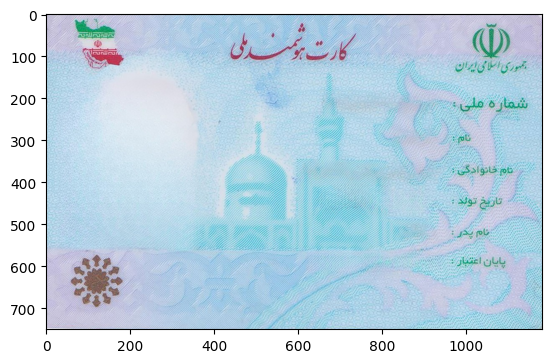

In [5]:
filename = './BackgroundNationalcard/aa.jpg'

# خواندن فایل تصویری به صورت باینری
with open(filename, 'rb') as f:
    img_bytes = f.read()

# تبدیل آرایه بایت‌ها به آرایه numpy از uint8
img_array = np.frombuffer(img_bytes, dtype=np.uint8)

# بازیابی تصویر با استفاده از تابع cv2.imdecode()
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)[:,:,::-1]
print(img.shape)
plt.imshow(img)

In [106]:
def generate_imagenational_card():
    img = Image.open("./BackgroundNationalcard/aa.jpg")
    width, height = img.size
    for i in range(10000):
        img1=img.copy()      
        font = ImageFont.truetype('./font/Yekan.ttf', 40)
        number = cardnumsn[i]

        drawn = ImageDraw.Draw(img1)

        width_pos, height_pos = (250, 520)
        text_width, text_height = drawn.textsize(number, font=font)

        drawn.text((width - text_width - width_pos, 
                height - text_height - height_pos), number, font=font, fill=(0, 0, 0))

        img1 = img1.crop((width - text_width - width_pos - 150, 
                    height - text_height - height_pos - 50, 
                    width - width_pos + 150,height - height_pos + 50))

        angle = random.randint(-5, 5)
        img1 = img1.rotate(angle)
        img1 = img1.crop((150 + random.randint(-40, -10),50 + random.randint(-10, 0),text_width + 150 + random.randint(10, 40),text_height + 50 + random.randint(10, 20)))
        im_array = np.array(img1)
        if i%10==0:
                # اعمال فیلتر گاوسی به تصویر اصلی
                blurred_img = cv2.GaussianBlur(im_array, (15, 15), 0)
                # ترکیب تصویر گاوسی با تصویر اصلی
                n_img = cv2.addWeighted(im_array, 0.5, blurred_img, 0.5, 0)
                # تبدیل تصویر از فرمت Numpy Array به فرمت Image
                img1 = Image.fromarray(n_img)
        if i%11==0:
                # اندازه و کانال‌های تصویر را بدست آورید
                rows, cols, channels = im_array.shape
                mean = 0
                variance = 0.15
                sigma = np.sqrt(variance)
                noise = np.random.normal(mean, sigma, (rows, cols, channels))
                noise = noise.astype(np.uint8)
                noisy_img = cv2.add(im_array, noise) 
                img1 = Image.fromarray(noisy_img)         
                                
        img1.save('./datanationalcard/' + number + ".jpg")
        
generate_imagenational_card()

C:\Users\user\AppData\Local\Temp\ipykernel_9564\1042107852.py:12: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = drawn.textsize(number, font=font)
C:\Users\user\AppData\Local\Temp\ipykernel_9564\1042107852.py:12: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = drawn.textsize(number, font=font)
C:\Users\user\AppData\Local\Temp\ipykernel_9564\1042107852.py:12: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = drawn.textsize(number, font=font)
C:\Users\user\AppData\Local\Temp\ipykernel_9564\1042107852.py:12: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = drawn.textsize(num

In [114]:
# Credit Cards

fonts_path = './font/'
fonts = os.listdir('./font/')

credit_card_path = './BackgroundCreditcard/'
credit_card_background = os.listdir('./BackgroundCreditcard/')

font_size = 25

def RandomSelect(path, folder):
  return path + random.choice(folder)

def generate_imagecredit_card():
    cc = 0

    for i in range(10000):
        # select random font
        font_type = RandomSelect(fonts_path, fonts)
        font = ImageFont.truetype(font_type, font_size + random.randint(-1, 1))
        font_color = (0, 0, 0)

        number = cardnums[i]

        credit_card_random_background = Image.open(RandomSelect(credit_card_path, credit_card_background))
        img = credit_card_random_background.copy()

        # Check The Color
        average = np.asarray(img).mean(axis=0).mean(axis=0)
        if average[0] * 0.299 + average[1] * 0.587 + average[2] * 0.114 < 130:
            font_color = (255, 255, 255)
            
        # Put The Text On Image
        width, height = (600, 200)

        drawn = ImageDraw.Draw(img)
        text_width, text_height = drawn.textsize(number, font=font)

        drawn.text(((width - text_width) / 2, (height - text_height) / 2), number, font=font, fill=font_color)


        angle = random.randint(-3, 3)
        img = img.rotate(angle)

        img = img.crop(((width - text_width) / 2 + random.randint(-40, -10),(height - text_height) / 2 + random.randint(-30, -15),(width + text_width) / 2 + random.randint(10, 40),(height + text_height) / 2 + random.randint(15, 30)))
        
        im_array = np.array(img)
        if i%10==0:
                # اعمال فیلتر گاوسی به تصویر اصلی
                blurred_img = cv2.GaussianBlur(im_array, (15, 15), 0)
                # ترکیب تصویر گاوسی با تصویر اصلی
                n_img = cv2.addWeighted(im_array, 0.5, blurred_img, 0.5, 0)
                # تبدیل تصویر از فرمت Numpy Array به فرمت Image
                img = Image.fromarray(n_img)
        if i%11==0:
                # اندازه و کانال‌های تصویر را بدست آورید
                rows, cols, channels = im_array.shape
                mean = 0
                variance = 0.15
                sigma = np.sqrt(variance)
                noise = np.random.normal(mean, sigma, (rows, cols, channels))
                noise = noise.astype(np.uint8)
                noisy_img = cv2.add(im_array, noise) 
                img = Image.fromarray(noisy_img)                  
        img.save('datacreditcard/' + number + ".jpg")

generate_imagecredit_card()

C:\Users\user\AppData\Local\Temp\ipykernel_9564\3241261149.py:37: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = drawn.textsize(number, font=font)
C:\Users\user\AppData\Local\Temp\ipykernel_9564\3241261149.py:37: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = drawn.textsize(number, font=font)
C:\Users\user\AppData\Local\Temp\ipykernel_9564\3241261149.py:37: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = drawn.textsize(number, font=font)
C:\Users\user\AppData\Local\Temp\ipykernel_9564\3241261149.py:37: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = drawn.textsize(num

In [8]:
# Credit Cards

fonts_path = './font/'
fonts = os.listdir('./font/')

credit_card_path = './BackgroundCreditcard/'
credit_card_background = os.listdir('./BackgroundCreditcard/')

font_size = 25

def RandomSelect(path, folder):
  return path + random.choice(folder)

def generate_imagecredit_card():
    cc = 0

    for i in range(100):
        # select random font
        font_type = RandomSelect(fonts_path, fonts)
        font = ImageFont.truetype(font_type, font_size + random.randint(-1, 1))
        font_color = (0, 0, 0)

        number = cardnums[i]

        credit_card_random_background = Image.open(RandomSelect(credit_card_path, credit_card_background))
        img = credit_card_random_background.copy()

        # Check The Color
        average = np.asarray(img).mean(axis=0).mean(axis=0)
        if average[0] * 0.299 + average[1] * 0.587 + average[2] * 0.114 < 130:
            font_color = (255, 255, 255)
            
        # Put The Text On Image
        width, height = (600, 200)

        drawn = ImageDraw.Draw(img)
        text_width, text_height = drawn.textsize(number, font=font)

        drawn.text(((width - text_width) / 2, (height - text_height) / 2), number, font=font, fill=font_color)


        angle = random.randint(-3, 3)
        img = img.rotate(angle)

        img = img.crop(((width - text_width) / 2 + random.randint(-40, -10),(height - text_height) / 2 + random.randint(-30, -15),(width + text_width) / 2 + random.randint(10, 40),(height + text_height) / 2 + random.randint(15, 30)))
        
        im_array = np.array(img)
        if i%10==0:
                # اعمال فیلتر گاوسی به تصویر اصلی
                blurred_img = cv2.GaussianBlur(im_array, (15, 15), 0)
                # ترکیب تصویر گاوسی با تصویر اصلی
                n_img = cv2.addWeighted(im_array, 0.5, blurred_img, 0.5, 0)
                # تبدیل تصویر از فرمت Numpy Array به فرمت Image
                img = Image.fromarray(n_img)
        if i%11==0:
                # اندازه و کانال‌های تصویر را بدست آورید
                rows, cols, channels = im_array.shape
                mean = 0
                variance = 0.15
                sigma = np.sqrt(variance)
                noise = np.random.normal(mean, sigma, (rows, cols, channels))
                noise = noise.astype(np.uint8)
                noisy_img = cv2.add(im_array, noise) 
                img = Image.fromarray(noisy_img)                  
        img.save('cardbank/' + number + ".jpg")

generate_imagecredit_card()

C:\Users\user\AppData\Local\Temp\ipykernel_3660\3256915255.py:37: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = drawn.textsize(number, font=font)
C:\Users\user\AppData\Local\Temp\ipykernel_3660\3256915255.py:37: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = drawn.textsize(number, font=font)
C:\Users\user\AppData\Local\Temp\ipykernel_3660\3256915255.py:37: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = drawn.textsize(number, font=font)
C:\Users\user\AppData\Local\Temp\ipykernel_3660\3256915255.py:37: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = drawn.textsize(num

KeyboardInterrupt: 

In [11]:
# Credit Cards

fonts_path = './font/'
fonts = os.listdir('./font/')

credit_card_path = './BackgroundCreditcard/'
credit_card_background = os.listdir('./BackgroundCreditcard/')

font_size = 25

def RandomSelect(path, folder):
  return path + random.choice(folder)

def generateimagecreditcard():
    cc = 0

    for i in range(100):
        # select random font
        font_type = RandomSelect(fonts_path, fonts)
        font = ImageFont.truetype(font_type, font_size + random.randint(-1, 1))
        font_color = (0, 0, 0)

        number = cardnums[i]

        credit_card_random_background = Image.open(RandomSelect(credit_card_path, credit_card_background))
        img = credit_card_random_background.copy()

        # Check The Color
        average = np.asarray(img).mean(axis=0).mean(axis=0)
        if average[0] * 0.299 + average[1] * 0.587 + average[2] * 0.114 < 130:
            font_color = (255, 255, 255)
            
        # Put The Text On Image
        width, height = (600, 200)

        drawn = ImageDraw.Draw(img)
        text_width, text_height = drawn.textsize(number, font=font)

        drawn.text(((width - text_width) / 2, (height - text_height) / 2), number, font=font, fill=font_color)


        angle = random.randint(-3, 3)
        img = img.rotate(angle)

        # img = img.crop(((width - text_width) / 2 + random.randint(-40, -10),(height - text_height) / 2 + random.randint(-30, -15),(width + text_width) / 2 + random.randint(10, 40),(height + text_height) / 2 + random.randint(15, 30)))
        
        im_array = np.array(img)
        if i%10==0:
                # اعمال فیلتر گاوسی به تصویر اصلی
                blurred_img = cv2.GaussianBlur(im_array, (15, 15), 0)
                # ترکیب تصویر گاوسی با تصویر اصلی
                n_img = cv2.addWeighted(im_array, 0.5, blurred_img, 0.5, 0)
                # تبدیل تصویر از فرمت Numpy Array به فرمت Image
                img = Image.fromarray(n_img)
        if i%11==0:
                # اندازه و کانال‌های تصویر را بدست آورید
                rows, cols, channels = im_array.shape
                mean = 0
                variance = 0.15
                sigma = np.sqrt(variance)
                noise = np.random.normal(mean, sigma, (rows, cols, channels))
                noise = noise.astype(np.uint8)
                noisy_img = cv2.add(im_array, noise) 
                img = Image.fromarray(noisy_img)                  
        img.save('cardbank/' +str(i) + ".jpg")
generateimagecreditcard()        

C:\Users\user\AppData\Local\Temp\ipykernel_3660\1106265750.py:37: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = drawn.textsize(number, font=font)
C:\Users\user\AppData\Local\Temp\ipykernel_3660\1106265750.py:37: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = drawn.textsize(number, font=font)
C:\Users\user\AppData\Local\Temp\ipykernel_3660\1106265750.py:37: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = drawn.textsize(number, font=font)
C:\Users\user\AppData\Local\Temp\ipykernel_3660\1106265750.py:37: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = drawn.textsize(num